In [32]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import config
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from datetime import datetime

# Data cleaning and preparation

In [33]:
df = pd.read_csv("data.csv")
df["office"] = df["additional_info"].apply(lambda x: 1 if "office" in str(x).lower() else 0)
df["remote"] = df["additional_info"].apply(lambda x: 1 if "remote" in str(x).lower() or "віддалено" in str(x).lower() else 0)
df["english-level"] = df["additional_info"].apply(lambda x: config.determine_english_level(str(x).lower()))
df["reviews"] = pd.to_numeric(df["reviews"], errors='coerce')
df["experience"] = pd.to_numeric(df["experience"], errors='coerce')

In [34]:
nltk.download("stopwords")
nltk.download("punkt")
df["description"] = df["description"].apply(lambda x: "".join([char.lower() if char.isalpha() or char.isspace() else " " for char in x]))
df["tokens"] = df["description"].apply(word_tokenize)
stop_words = set(stopwords.words("english")) | config.custom_stop_words
df["filtered_tokens"] = df["tokens"].apply(lambda x: [word for word in x if word.lower() not in stop_words])
df["word_count"] = df["filtered_tokens"].apply(lambda x: FreqDist(x))

for technology in config.technologies:
    df[technology] = df["description"].apply(lambda x: 1 if technology.lower() in x.lower() else 0)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
datetime = datetime.now().date()
requirements = os.path.join("archive", "requirements")
junior_skills = os.path.join("archive", "junior_skills")
middle_skills = os.path.join("archive", "middle_skills")
senior_skills = os.path.join("archive", "senior_skills")
experience = os.path.join("archive", "experience")
english = os.path.join("archive", "english")
location = os.path.join("archive", "location")

# Analysis of supply and demand

This statistic describes the total number of vacancies, reviews and their relationship
We can look at the maximum and average number of reviews for a job to understand competition

In [36]:
total = df.shape[0]
print(f"The total number of vacancies is {total}")
demand = (total / df["reviews"].sum()).round(2)
supply = (df["reviews"].sum() / df.shape[0]).round(2)
print(f"There are {demand} vacancies per review. {supply} reviews per vacancy.")
max_reviews = df["reviews"].max()
max_views = df["views"].max()
print(f"The maximum number of reviews per vacancy is {max_reviews}.\n"
      f"The maximum number of views per vacancy is {max_views}.")

The total number of vacancies is 425
There are 0.04 vacancies per review. 27.78 reviews per vacancy.
The maximum number of reviews per vacancy is 300.0.
The maximum number of views per vacancy is views.


General statistics of reviews and views

In [37]:
print("Review statistic:")
review = df["reviews"].describe()
print(review)
print("_________________________________\n View statistic:")
view = df["views"].describe()
print(view)

Review statistic:
count    424.000000
mean      27.846698
std       46.632537
min        0.000000
25%        4.000000
50%       11.000000
75%       30.000000
max      300.000000
Name: reviews, dtype: float64
_________________________________
 View statistic:
count     425
unique    212
top        37
freq        9
Name: views, dtype: object


These statistics describe the needs and available resources in the market by the factor of work experience

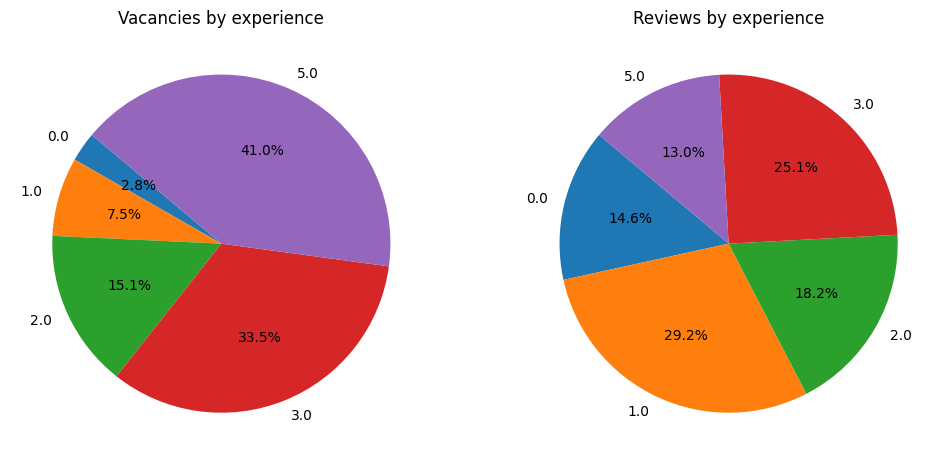

In [38]:
vacancies = df.groupby("experience")["position"].count()
reviews = df.groupby("experience")["reviews"].sum()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(vacancies, labels=vacancies.index, autopct='%1.1f%%', startangle=140)
plt.title("Vacancies by experience")

plt.subplot(1, 2, 2)
plt.pie(reviews, labels=reviews.index, autopct='%1.1f%%', startangle=140)
plt.title("Reviews by experience")
plt.savefig(os.path.join(experience, f"experience{datetime}.png"))
plt.show()

# Companies analysis

These statistics provide information on the total number of companies looking for developers and the top by the number of vacancies

In [39]:
companies = df["company"].unique().shape[0]
print(f"{companies} - the numer of companies looking for python developers")
top5 = df.groupby("company")["position"].count().nlargest(5, "all")
top5

186 - the numer of companies looking for python developers


company
Luxoft                       31
Dataforest                   14
Adaptiq                      12
GlobalLogic                   9
MoveUp Recruitment agency     9
Name: position, dtype: int64

# Popular vacancies analysis

This information makes it possible to understand the most popular vacancies by the number of views and reviews

In [40]:
top10 = df[["position", "company", "reviews", "link"]].sort_values(by="reviews", ascending=False)[:10]
print(f"Top 10 vacancies by review")
top10

Top 10 vacancies by review


,position,company,reviews,link
355,Data Scrap Specialist (Python),Flai,300.0,https://djinni.co/jobs/618649-data-scrap-speci...
330,Junior Python Developer,GT-Protocol,291.0,https://djinni.co/jobs/619289-junior-python-de...
335,Junior RPA developer,UAI Labs,259.0,https://djinni.co/jobs/619246-junior-rpa-devel...
308,Python/Django developer,Right Link,250.0,https://djinni.co/jobs/620157-python-django-de...
70,Data Scrap Specialist (Python),Flai,240.0,https://djinni.co/jobs/618649-data-scrap-speci...
132,Python Developer,Lumitech,230.0,https://djinni.co/jobs/617286-python-developer/
21,Python Developer (Junior),Profisea,225.0,https://djinni.co/jobs/619869-python-developer...
39,Junior Python Developer,GT-Protocol,217.0,https://djinni.co/jobs/619289-junior-python-de...
46,Junior Python Developer,Forager.ai,213.0,https://djinni.co/jobs/619249-junior-python-de...
180,Python + Django,JetUp,192.0,https://djinni.co/jobs/615722-python-django/


In [41]:
top10 = df[["position", "company", "views", "link"]].sort_values(by="views", ascending=False)[:10]
print(f"Top 10 vacancies by view")
top10

Top 10 vacancies by view


,position,company,views,link
198,position,company,views,link
11,Back-End Python (Django) Developer,StrimkoSoft,99,https://djinni.co/jobs/620117-back-end-python-...
243,Senior SDET (Python development experience),SPD Technology,99,https://djinni.co/jobs/597858-senior-sdet-pyth...
217,Python developer,YozmaTech,99,https://djinni.co/jobs/622411-python-developer/
250,Middle Backend Developer (Python),Volindo,99,https://djinni.co/jobs/621439-middle-backend-d...
82,Middle/Senior Python+JS developer,Piligrim IT,98,https://djinni.co/jobs/618429-middle-senior-py...
25,Senior Python Developer for algorithm developm...,Spreenauten,97,https://djinni.co/jobs/619816-senior-python-de...
113,Python Developer,Luxoft,96,https://djinni.co/jobs/617630-python-developer/
33,Back-End Engineer (Python),Preply,96,https://djinni.co/jobs/612403-back-end-enginee...
386,Python Developer/Data Engineer,Ajax Systems,95,https://djinni.co/jobs/547702-python-developer...


# Location

Here is an analysis of job vacancies in Ukraine and abroad, distinguishing between office and remote positions

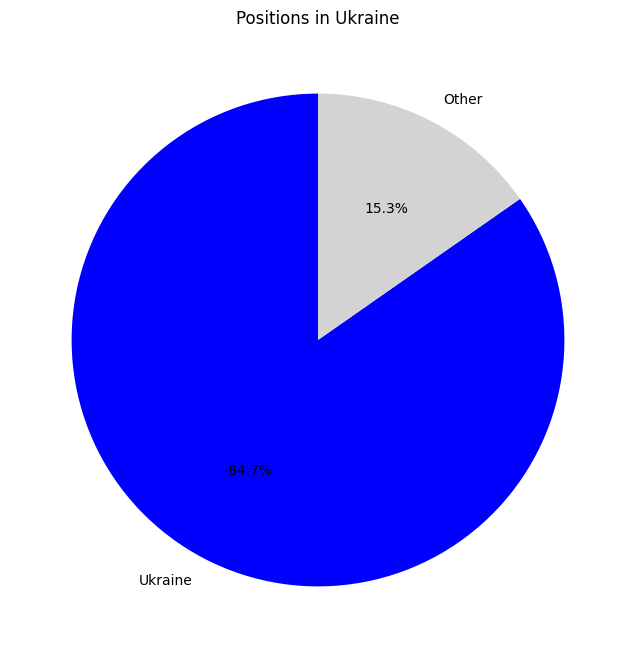

In [42]:
ua = df[df["location"].str.contains("Україна")].shape[0]
plt.figure(figsize=(8, 8))
plt.pie([ua, total - ua], labels=["Ukraine", "Other"],
        autopct='%1.1f%%', startangle=90, colors=["blue", "lightgray"])
plt.title("Positions in Ukraine")
plt.savefig(os.path.join(location, f"country{datetime}.png"))
plt.show()

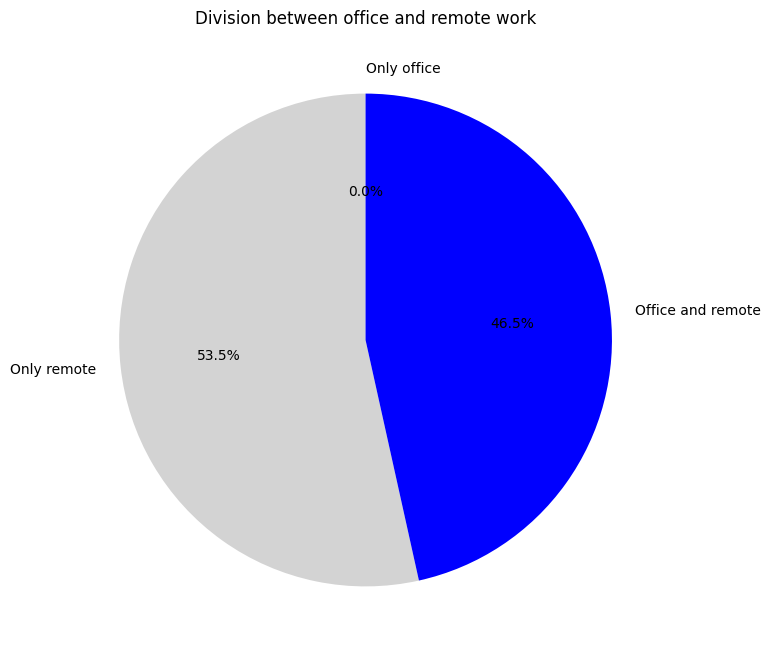

In [43]:
office = df[(df["office"] == 1) & (df["remote"] == 0)].shape[0]
remote = df[(df["office"] == 0) & (df["remote"] == 1)].shape[0]
office_remote = df[(df["office"] == 1) & (df["remote"] == 1)].shape[0]

plt.figure(figsize=(8, 8))
plt.pie([office, remote, office_remote], labels=["Only office", "Only remote", "Office and remote"], autopct="%1.1f%%", startangle=90, colors=["blue", "lightgray"])
plt.title("Division between office and remote work")
plt.savefig(os.path.join(location, f"office-remote{datetime}.png"))
plt.show()

# English level

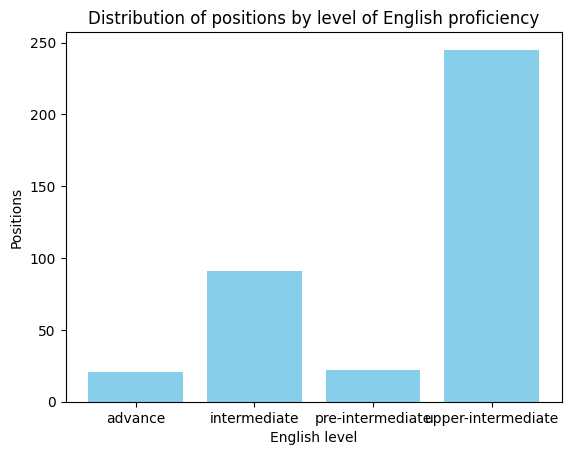

In [44]:
data = df[df["english-level"].notna()]
english_level = data.groupby("english-level")["position"].count()

plt.bar(english_level.index, english_level.values, color="skyblue")
plt.xlabel("English level")
plt.ylabel("Positions")
plt.title("Distribution of positions by level of English proficiency")
plt.savefig(os.path.join(english, f"english{datetime}.png"))
plt.show()

# Technologies analysis

The histogram allows you to see the most common skills among the requirements of companies

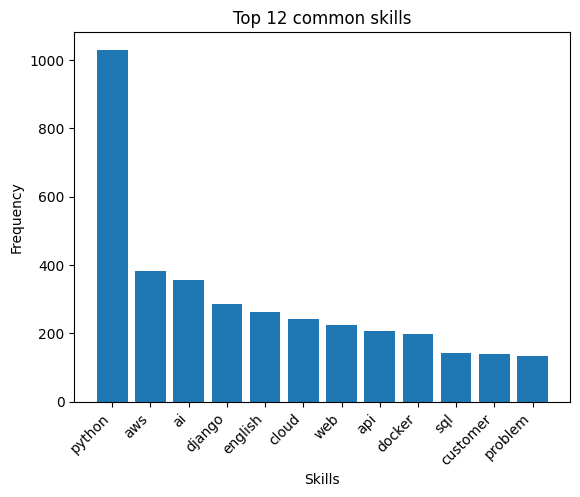

In [45]:
common_words = FreqDist([word for sublist in df["filtered_tokens"] for word in sublist])

top_words = common_words.most_common(12)
words, counts = zip(*top_words)

plt.bar(words, counts)
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.title("Top 12 common skills")
plt.xticks(rotation=45, ha="right")
plt.savefig(os.path.join(requirements, f"common{datetime}.png"))
plt.show()

# Analysis of requirements for vacancies with less than 3 years of work experience

This information provides an opportunity to analyze the prevalence of specific technologies among vacancies

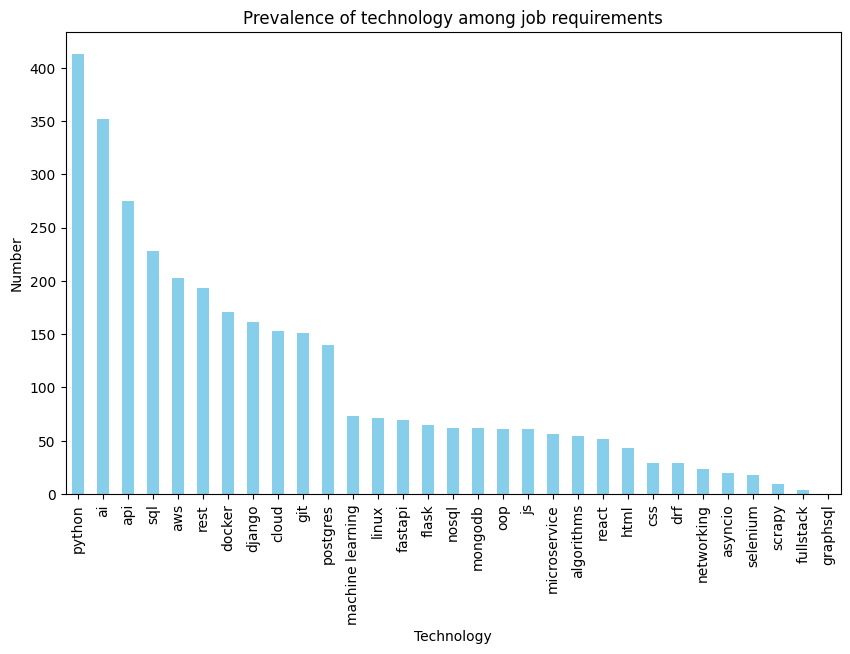

In [46]:
technologies = df[config.technologies].sum()


plt.figure(figsize=(10, 6))
technologies.sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Prevalence of technology among job requirements")
plt.xlabel("Technology")
plt.ylabel("Number")
plt.savefig(os.path.join(requirements, f"specific{datetime}.png"))
plt.show()

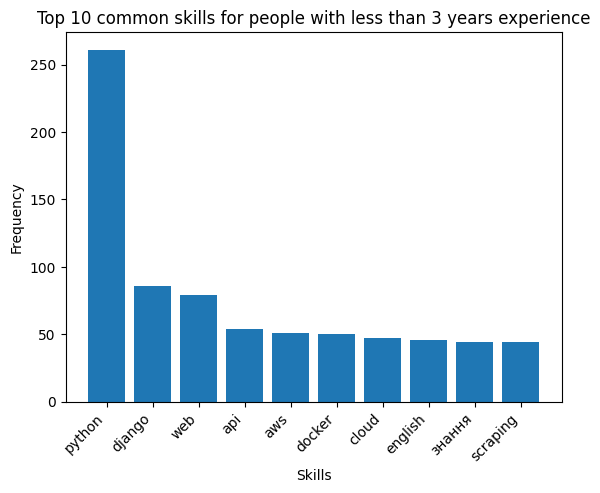

In [47]:
df_less_than_3_years_experience = df[df["experience"] < 3]
common_words = FreqDist([word for sublist in df_less_than_3_years_experience["filtered_tokens"] for word in sublist])

top_words = common_words.most_common(10)
words, counts = zip(*top_words)

plt.bar(words, counts)
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.title("Top 10 common skills for people with less than 3 years experience")
plt.xticks(rotation=45, ha="right")
plt.savefig(os.path.join(junior_skills, f"common{datetime}.png"))
plt.show()

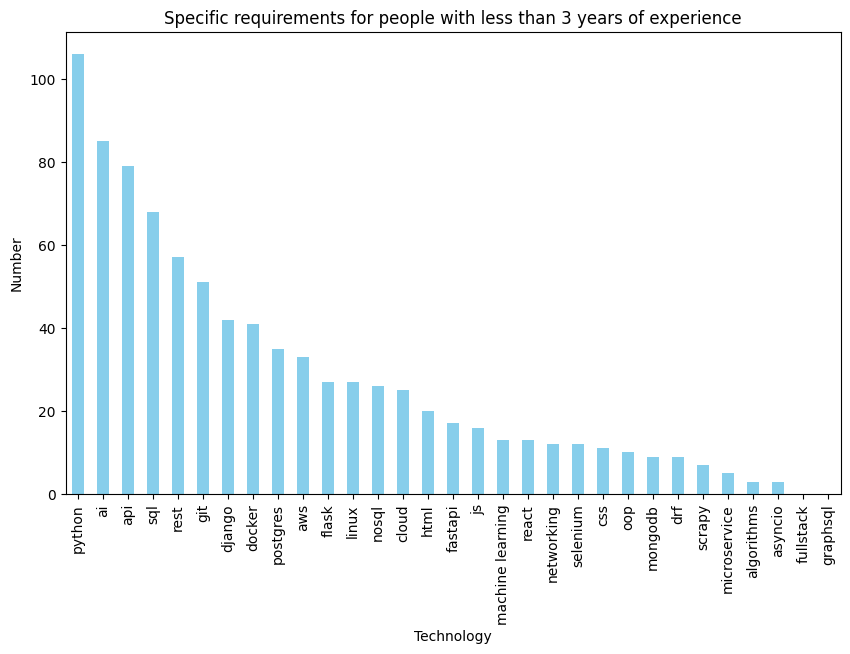

In [48]:
technologies = df[df["experience"] < 3][config.technologies].sum()

plt.figure(figsize=(10, 6))
technologies.sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Specific requirements for people with less than 3 years of experience")
plt.xlabel("Technology")
plt.ylabel("Number")
plt.savefig(os.path.join(junior_skills, f"specific{datetime}.png"))
plt.show()

# Analysis of requirements for vacancies with  3 years of work experience

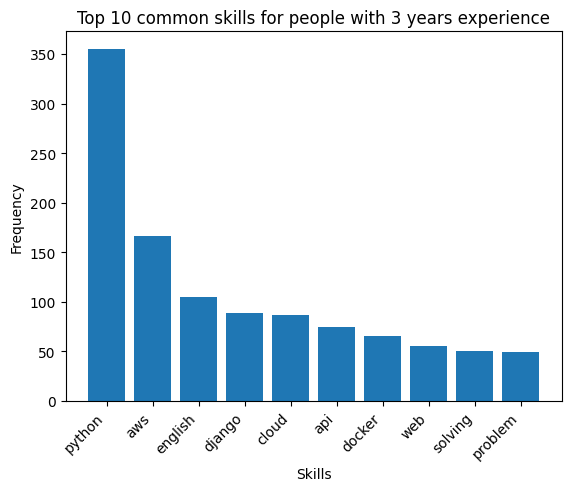

In [49]:
df_3_years_experience = df[df["experience"] == 3]
common_words = FreqDist([word for sublist in df_3_years_experience["filtered_tokens"] for word in sublist])

top_words = common_words.most_common(10)
words, counts = zip(*top_words)

plt.bar(words, counts)
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.title("Top 10 common skills for people with 3 years experience")
plt.xticks(rotation=45, ha="right")
plt.savefig(os.path.join(middle_skills, f"common{datetime}.png"))
plt.show()

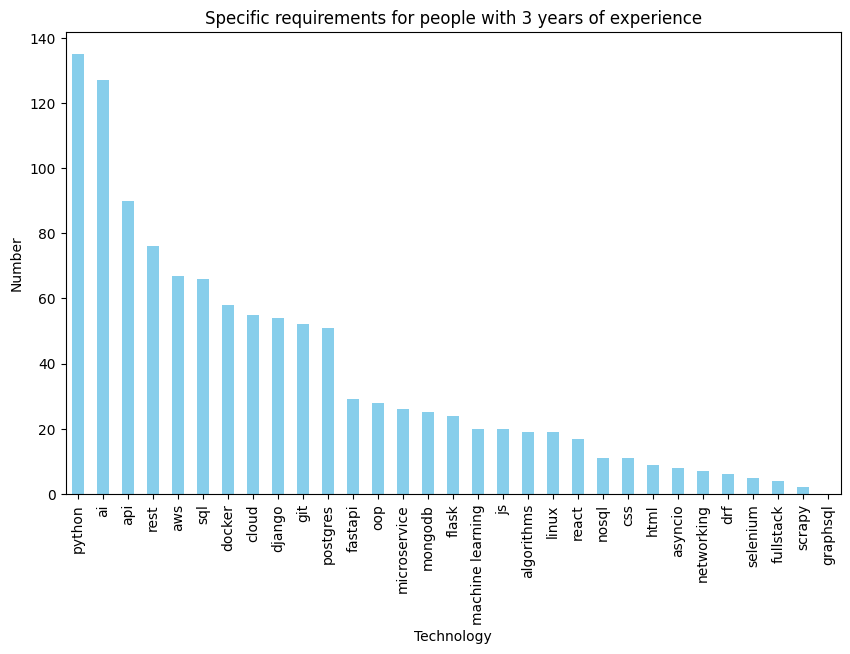

In [50]:
technologies = df[df["experience"] == 3][config.technologies].sum()

plt.figure(figsize=(10, 6))
technologies.sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Specific requirements for people with 3 years of experience")
plt.xlabel("Technology")
plt.ylabel("Number")
plt.savefig(os.path.join(middle_skills, f"specific{datetime}.png"))
plt.show()

# Analysis of requirements for vacancies with  3 years of work experience

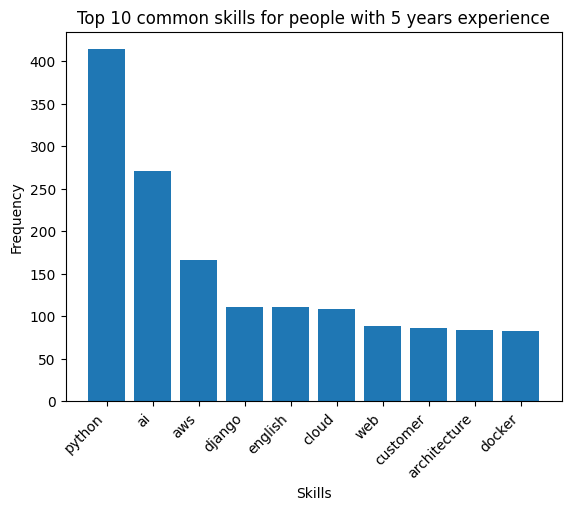

In [51]:
df_5_years_experience = df[df["experience"] == 5]
common_words = FreqDist([word for sublist in df_5_years_experience["filtered_tokens"] for word in sublist])

top_words = common_words.most_common(10)
words, counts = zip(*top_words)

plt.bar(words, counts)
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.title("Top 10 common skills for people with 5 years experience")
plt.xticks(rotation=45, ha="right")
plt.savefig(os.path.join(senior_skills, f"common{datetime}.png"))
plt.show()

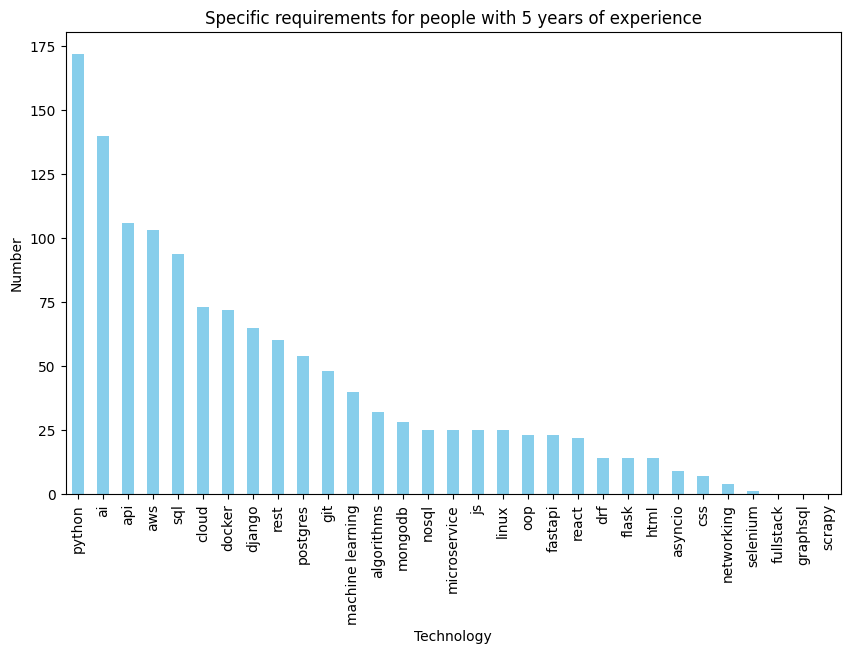

In [52]:
technologies = df[df["experience"] == 5][config.technologies].sum()

plt.figure(figsize=(10, 6))
technologies.sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Specific requirements for people with 5 years of experience")
plt.xlabel("Technology")
plt.ylabel("Number")
plt.savefig(os.path.join(senior_skills, f"specific{datetime}.png"))
plt.show()

# Analysis of the relationship between the number of responses to the vacancy and the amount of experience, available technologies in demand

In [53]:
selected_columns = config.technologies.copy()
selected_columns.extend(["experience", "reviews"])
print("As of 01/10/2023, the highest correlation is observed between feedback and experience, feedback and availability of aws. In both cases, the number of responses decreases with the growth of the second indicator")
df[selected_columns].corr()

As of 01/10/2023, the highest correlation is observed between feedback and experience, feedback and availability of aws. In both cases, the number of responses decreases with the growth of the second indicator


,python,git,sql,rest,api,docker,aws,linux,django,postgres,...,algorithms,drf,fastapi,asyncio,graphsql,cloud,selenium,scrapy,experience,reviews
python,1.000000,-0.051538,0.126408,0.012822,0.141627,0.139861,0.106124,0.076338,0.045267,0.059024,...,0.065032,0.046128,0.075044,0.037879,NaN,0.127843,0.035847,0.025072,0.027994,0.038961
git,-0.051538,1.000000,-0.029646,0.211587,0.147052,0.112735,-0.070124,0.010202,-0.062859,0.065468,...,-0.017506,0.013579,0.073119,0.020758,NaN,0.139704,0.014762,-0.075044,-0.159251,0.112104
sql,0.126408,-0.029646,1.000000,0.080186,0.231740,0.271957,0.067036,0.188605,0.239556,0.551097,...,-0.098742,0.139268,0.089354,0.072874,NaN,-0.069597,0.078336,0.071176,-0.041654,0.125728
rest,0.012822,0.211587,0.080186,1.000000,0.337391,0.070794,0.130697,0.047605,0.135289,0.215412,...,-0.120932,0.165504,0.123868,0.065111,NaN,0.152802,-0.074483,-0.101331,-0.137752,0.047545
api,0.141627,0.147052,0.231740,0.337391,1.000000,0.304763,0.213379,-0.012423,0.069258,0.213831,...,-0.087835,0.160809,0.325146,0.094370,NaN,0.276956,0.106421,0.108631,-0.081800,0.041381
docker,0.139861,0.112735,0.271957,0.070794,0.304763,1.000000,0.156795,0.057021,0.091211,0.262074,...,-0.039290,0.215638,0.172240,0.134885,NaN,0.204327,0.065702,0.045953,0.048382,-0.067484
aws,0.106124,-0.070124,0.067036,0.130697,0.213379,0.156795,1.000000,-0.011529,0.020381,0.011320,...,-0.067793,0.096178,0.077183,-0.034544,NaN,0.391764,-0.060759,-0.075215,0.230950,-0.232819
linux,0.076338,0.010202,0.188605,0.047605,-0.012423,0.057021,-0.011529,1.000000,-0.024660,0.142416,...,0.018539,0.028900,-0.026119,0.049410,NaN,0.005782,0.187700,0.109375,-0.076538,-0.033106
django,0.045267,-0.062859,0.239556,0.135289,0.069258,0.091211,0.020381,-0.024660,1.000000,0.216360,...,-0.006648,0.346530,0.037633,-0.036109,NaN,-0.161279,-0.091975,-0.081174,0.007049,0.102111
postgres,0.059024,0.065468,0.551097,0.215412,0.213831,0.262074,0.011320,0.142416,0.216360,1.000000,...,-0.102041,0.227274,0.098701,0.080656,NaN,-0.035461,-0.047962,0.001227,-0.026457,0.108260
